# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [24]:
df_data = pd.read_csv('NLSY97_subset.csv')[['EARNINGS', 'S', 'EXP']]

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [26]:
df_data.shape
print(f"Data has {df_data.shape[0]} rows and {df_data.shape[1]} columns.")
df_data.columns
df_data.head()

Data has 2000 rows and 3 columns.


,EARNINGS,S,EXP
0,18.50,12,9.71
1,19.23,17,5.71
2,39.05,14,9.94
3,16.80,18,1.54
4,36.06,15,2.94


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [27]:
df_data.isna().values.any()

False

In [30]:
df_data.duplicated().values.any()
df_data[df_data.duplicated()]
df_data.drop_duplicates(inplace=True)

## Descriptive Statistics

In [31]:
df_data.describe()

,EARNINGS,S,EXP
count,"1,486.00","1,486.00","1,486.00"
mean,18.81,14.56,6.70
std,12.00,2.77,2.86
min,2.00,6.00,0.00
25%,11.41,12.00,4.66
50%,15.75,15.00,6.63
75%,22.60,16.00,8.71
max,132.89,20.00,14.73


## Visualise the Features

<Figure size 1600x800 with 0 Axes>

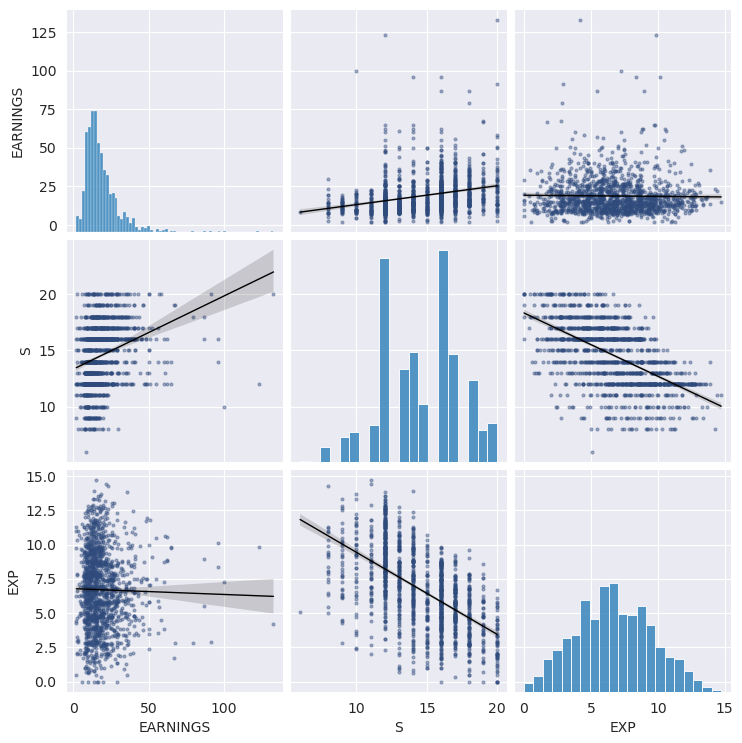

In [32]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    sns.pairplot(
        df_data,
        kind='reg',
        plot_kws={
            'line_kws': {'color': 'black', 'lw': 1},
            'scatter_kws': {'color': '#2f4b7c', 'alpha': 0.4, 's': 4}
        }
        )
plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [43]:
target = df_data['EARNINGS']
features = df_data.drop(['EARNINGS', 'EXP'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.2,
    random_state=10
    )

In [44]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:.3}%')

Training data is 79.9% of the total data
Test data makes up the remaining 20.1%


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [48]:
regr = LinearRegression()
regr.fit(X_train, y_train)

rsquared = regr.score(X_train, y_train)
print(f'Training data r-squared: {rsquared:.3}.')

Training data r-squared: 0.0835.


0.0835 Is a very low r-squared.

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [49]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,1.25


In [52]:
print(f'For every additional year of schooling a person can expect to earn {regr_coef.Coefficient[0]:.3} additional $s every hour. ')

For every additional year of schooling a person can expect to earn 1.25 additional $s every hour. 


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [54]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

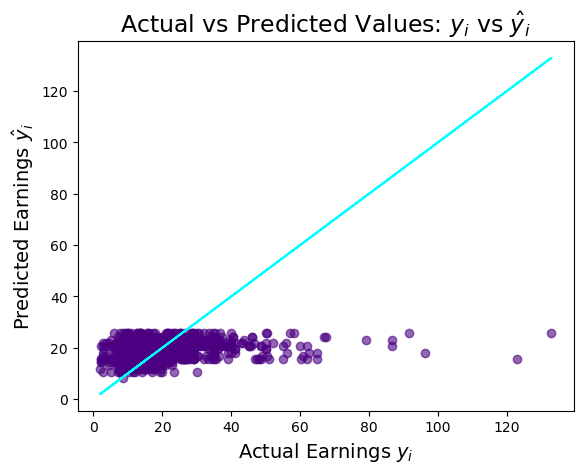

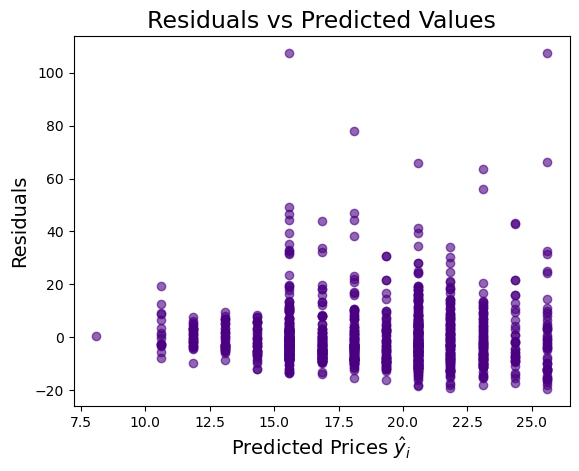

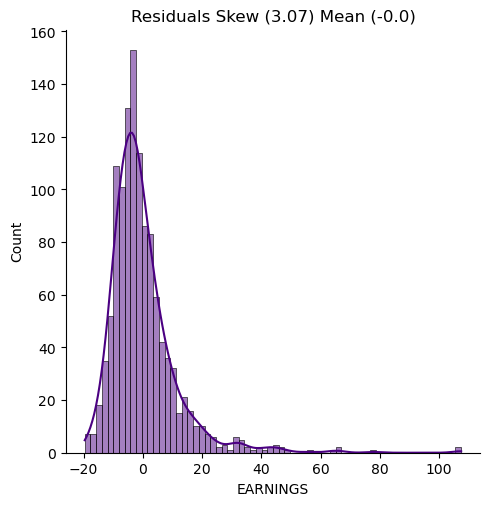

In [57]:
# Original regression of Actual vs Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Values: $y_i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings $y_i$', fontsize=14)
plt.ylabel('Predicted Earnings $\hat y_i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [74]:
target = df_data['EARNINGS']
features = df_data.drop('EARNINGS', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [75]:
train_pct = 100*len(X_train)/len(features)
print(f"Training data is {train_pct:.3}% of total data")

test_pct = 100*X_test.shape[0]/features.shape[0]
print(f"Test data is the remaning {test_pct:.3}% of the data")

Training data is 79.9% of total data
Test data is the remaning 20.1% of the data


In [76]:
regr = LinearRegression()
regr.fit(X_train, y_train)

rsquared = regr.score(X_train, y_train)
print(f"Training Data Rsquared is {rsquared:.3}")

Training Data Rsquared is 0.11


A bit better r-squared compared to using only 1 predictor

### Evaluate the Coefficients of the Model

In [77]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,1.80
EXP,1.03


In [82]:
print(f"For every additional year of schooling, person can earn {regr_coef.loc['S'].values[0]:.3} additional $ every hour and for every additional year of experience {regr_coef.loc['EXP'].values[0]:.3} additional $s")

For every additional year of schooling, person can earn 1.8 additional $ every hour and for every additional year of experience 1.03 additional $s


### Analyse the Estimated Values & Regression Residuals

In [89]:
predict_train = regr.predict(X_train)
residuals = (y_train - predict_train)

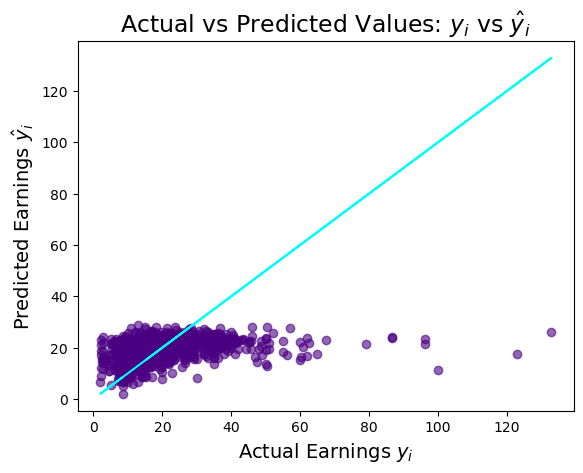

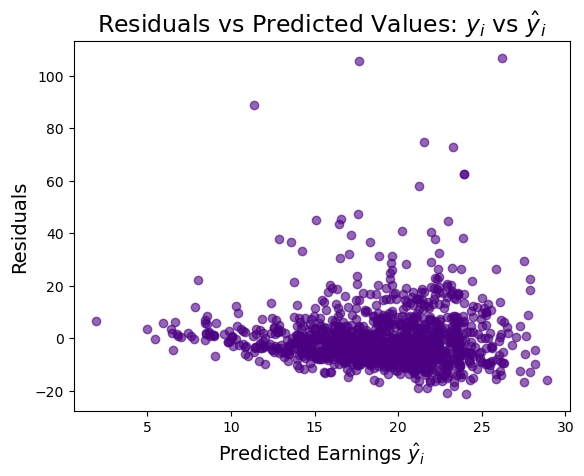

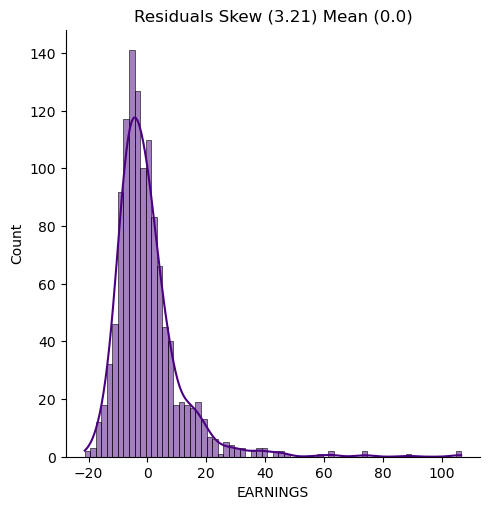

In [90]:
# Regression of Actual vs Predicted Values
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predict_train, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title('Actual vs Predicted Values: $y_i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings $y_i$', fontsize=14)
plt.ylabel('Predicted Earnings $\hat y_i$', fontsize=14)
plt.show()

# Residuals vs Predicted vals
plt.figure(dpi=100)
plt.scatter(x=predict_train, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values: $y_i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()


# Residual skew and mean
resid_skew = round(residuals.skew(), 2)
resid_mean = round(residuals.mean(), 2)


sns.displot(residuals, kde='True', color='indigo')
plt.title(f"Residuals Skew ({resid_skew}) Mean ({resid_mean})")
plt.show()

In the second Model, where we take Years of Experience into the account, predictions are a bit more reliable but it's still not a good model, since R-squared is only 0.11. 
Only real improvement we see is in the randomness of residuals by a little bit.
We can conclude that only 2 indicators as features are not enough to create a precise model to predict earnings of people in the sample.

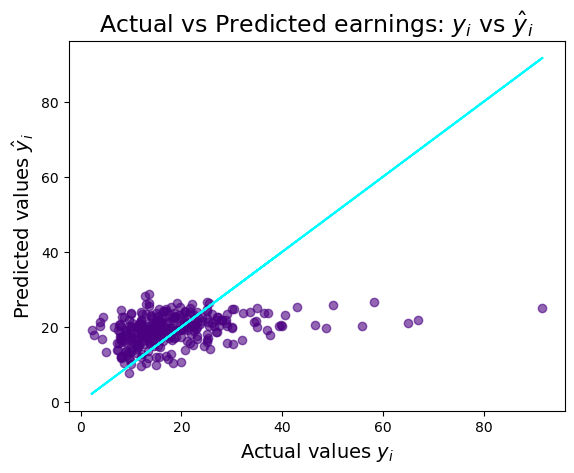

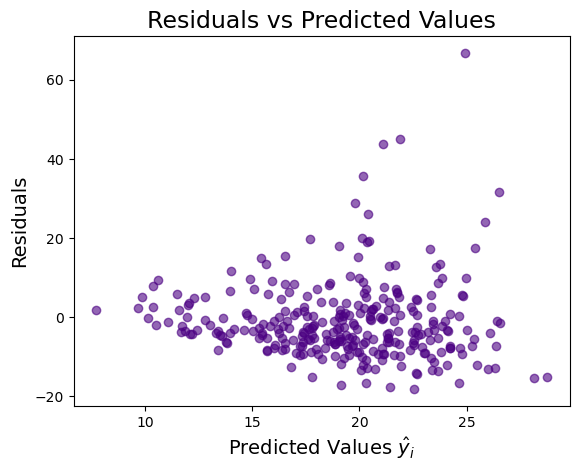

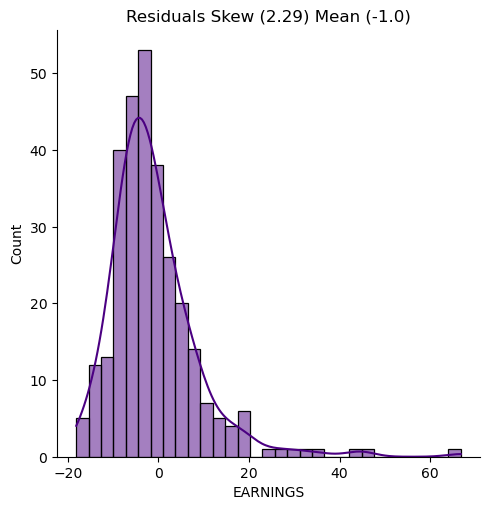

In [94]:
# Using X_test to predict
predict_test = regr.predict(X_test)
residuals = (y_test - predict_test)

# Original Regression of Actual vs Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_test, y=predict_test, c='indigo', alpha=0.6)
plt.plot(y_test, y_test, color='cyan')
plt.title('Actual vs Predicted earnings: $y_i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual values $y_i$', fontsize=14)
plt.ylabel('Predicted values $\hat y_i$', fontsize=14)
plt.show()

# Residuals vs Predicted Values
plt.figure(dpi=100)
plt.scatter(x=predict_test, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Values $\hat y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f"Residuals Skew ({resid_skew}) Mean ({resid_mean})")
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [103]:
regr.coef_
predicted_earning = regr.intercept_ + regr.coef_[0]*16 + regr.coef_[1]*5
predicted_earning
print(f'Someone with 16 years of schooling and 5 years of working experience can earn as much as {predicted_earning:.3}$ per hour based on the model.')

Someone with 16 years of schooling and 5 years of working experience can earn as much as 19.9$ per hour based on the model.


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

We absolutely need to add more features to make this model more powerful. One of the features to consider is whether an individual has Master's Degree, whether they are working in private or public sector, what is their sex and race. 

### Remainder: Use the abovementioned Features to create a new model. 